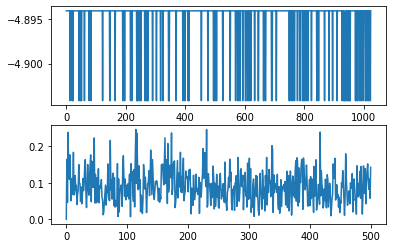

t2-t1 = 1039ms, t3-t2 =503ms
t2-t1 = 519ms, t3-t2 =79ms
t2-t1 = 953ms, t3-t2 =108ms
t2-t1 = 906ms, t3-t2 =96ms
t2-t1 = 936ms, t3-t2 =109ms
t2-t1 = 910ms, t3-t2 =79ms
t2-t1 = 942ms, t3-t2 =128ms
t2-t1 = 899ms, t3-t2 =78ms
t2-t1 = 940ms, t3-t2 =143ms
t2-t1 = 890ms, t3-t2 =111ms
t2-t1 = 911ms, t3-t2 =111ms
t2-t1 = 920ms, t3-t2 =110ms
t2-t1 = 912ms, t3-t2 =127ms
t2-t1 = 903ms, t3-t2 =174ms
t2-t1 = 842ms, t3-t2 =95ms
t2-t1 = 921ms, t3-t2 =118ms
t2-t1 = 916ms, t3-t2 =127ms
t2-t1 = 898ms, t3-t2 =124ms
t2-t1 = 894ms, t3-t2 =110ms
t2-t1 = 920ms, t3-t2 =63ms
t2-t1 = 957ms, t3-t2 =106ms
t2-t1 = 911ms, t3-t2 =88ms
t2-t1 = 935ms, t3-t2 =100ms
t2-t1 = 926ms, t3-t2 =67ms
t2-t1 = 953ms, t3-t2 =80ms
t2-t1 = 955ms, t3-t2 =100ms
t2-t1 = 916ms, t3-t2 =115ms
t2-t1 = 918ms, t3-t2 =63ms
t2-t1 = 957ms, t3-t2 =94ms
t2-t1 = 936ms, t3-t2 =69ms
t2-t1 = 944ms, t3-t2 =106ms
t2-t1 = 915ms, t3-t2 =116ms
t2-t1 = 919ms, t3-t2 =122ms
t2-t1 = 895ms, t3-t2 =105ms
t2-t1 = 928ms, t3-t2 =72ms
t2-t1 = 944ms, t3-t2 =100ms
t2-t

In [6]:
%config IPCompleter.greedy=True
import matplotlib.pylab as plt
import nidaqmx
import time
import numpy as np
from nidaqmx.constants import TerminalConfiguration, VoltageUnits, AcquisitionType, Edge

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

nfft = 1024
fs = 1000.0
freqs = np.linspace(0, fs/2, 513)

with nidaqmx.Task() as task:
    task.ai_channels.add_ai_voltage_chan("Dev1/ai0", terminal_config=TerminalConfiguration.RSE, min_val=-5.0, max_val=5.0, units=VoltageUnits.VOLTS)
    task.timing.cfg_samp_clk_timing(fs, active_edge=Edge.RISING, sample_mode=AcquisitionType.CONTINUOUS, samps_per_chan=nfft)

    # task.start()
    # task.stop()
    while True:
        try:
            t1 = (int(round(time.time() * 1000)))
            data = task.read(number_of_samples_per_channel=nfft)
            t2 = (int(round(time.time() * 1000)))
            tdata = np.array(data)
            tdata -= np.mean(tdata)
            ffto = np.fft.fft(tdata)
            ffto = np.abs(ffto)
            ffto = ffto[0:513]

            ax1.clear()
            ax2.clear()
            ax1.plot(data)
            ax2.plot(freqs, ffto)
            fig.show(0)
            plt.pause(0.000000001)
            t3 = (int(round(time.time() * 1000)))
            print('t2-t1 = {}ms, t3-t2 ={}ms'.format(t2-t1, t3-t2))
        except KeyboardInterrupt:
            break 